<a href="https://colab.research.google.com/github/T4690/DECISION-TREE-IMPLEMENTATION/blob/main/Decision_Tree_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandasand scikit package
import pandas as pd
import sklearn.datasets as datas
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
#Load the diabetes dataset
diabetesdata = datas.load_diabetes()
diabetesdata

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
#check datatype
type(diabetesdata)

sklearn.utils._bunch.Bunch

In [ ]:
#examine the keys present in the dataset
diabetesdata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diabetesdata.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
#collect all the indepent variables and store it as an object diabetesIndData
diabetesIndData = diabetesdata.data

In [ ]:
#covert the object into a pandas dataframe
diabetesIndData = pd.DataFrame(diabetesdata.data)
diabetesIndData.head(5)


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
#Display the features names in the dataset
diabetesdata.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#create an list with all the column names
diabetesIndData.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
diabetesIndData.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
#split the dataset-80% to training dataset and 20% to test dataset
diabetesIndTrain, diabetesIndTest, diabetesDepTrain, diabetesDepTest = train_test_split(diabetesIndData, diabetesdata.target, test_size=0.2, random_state=1)

In [ ]:
#Instantiate the decision tree model
dt = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')

In [ ]:
#Build model
model = dt.fit(diabetesIndTrain, diabetesDepTrain)

In [ ]:
#obtain the predictions for the model
predictedData = model.predict(diabetesIndTest)
predictedData

array([ 90.,  53.,  55.,  53.,  91., 237., 164.,  55., 185.,  71., 220.,
       220.,  71.,  60., 237.,  55.,  90.,  71.,  53., 164.,  91.,  55.,
        60.,  55.,  71., 237.,  55.,  55.,  71., 164.,  91., 164., 220.,
        71., 185., 220.,  53., 248.,  91., 248., 185., 185.,  71.,  71.,
        90., 248.,  70., 185.,  91., 248.,  60.,  55.,  71., 185., 237.,
        71.,  90.,  47.,  55.,  47., 185., 237.,  91.,  53., 248.,  55.,
        55., 220., 220.,  47., 220.,  55.,  55.,  71.,  91.,  90.,  55.,
        55.,  91.,  60.,  71.,  71.,  60.,  91.,  71.,  71.,  71.,  53.,
       164.])

In [ ]:
#import graphviz package
import graphviz

In [ ]:
#visualize the decision tree
dot_data=tree.export_graphviz(model, out_file=None, feature_names=diabetesIndData.columns, filled=True, rounded=True)

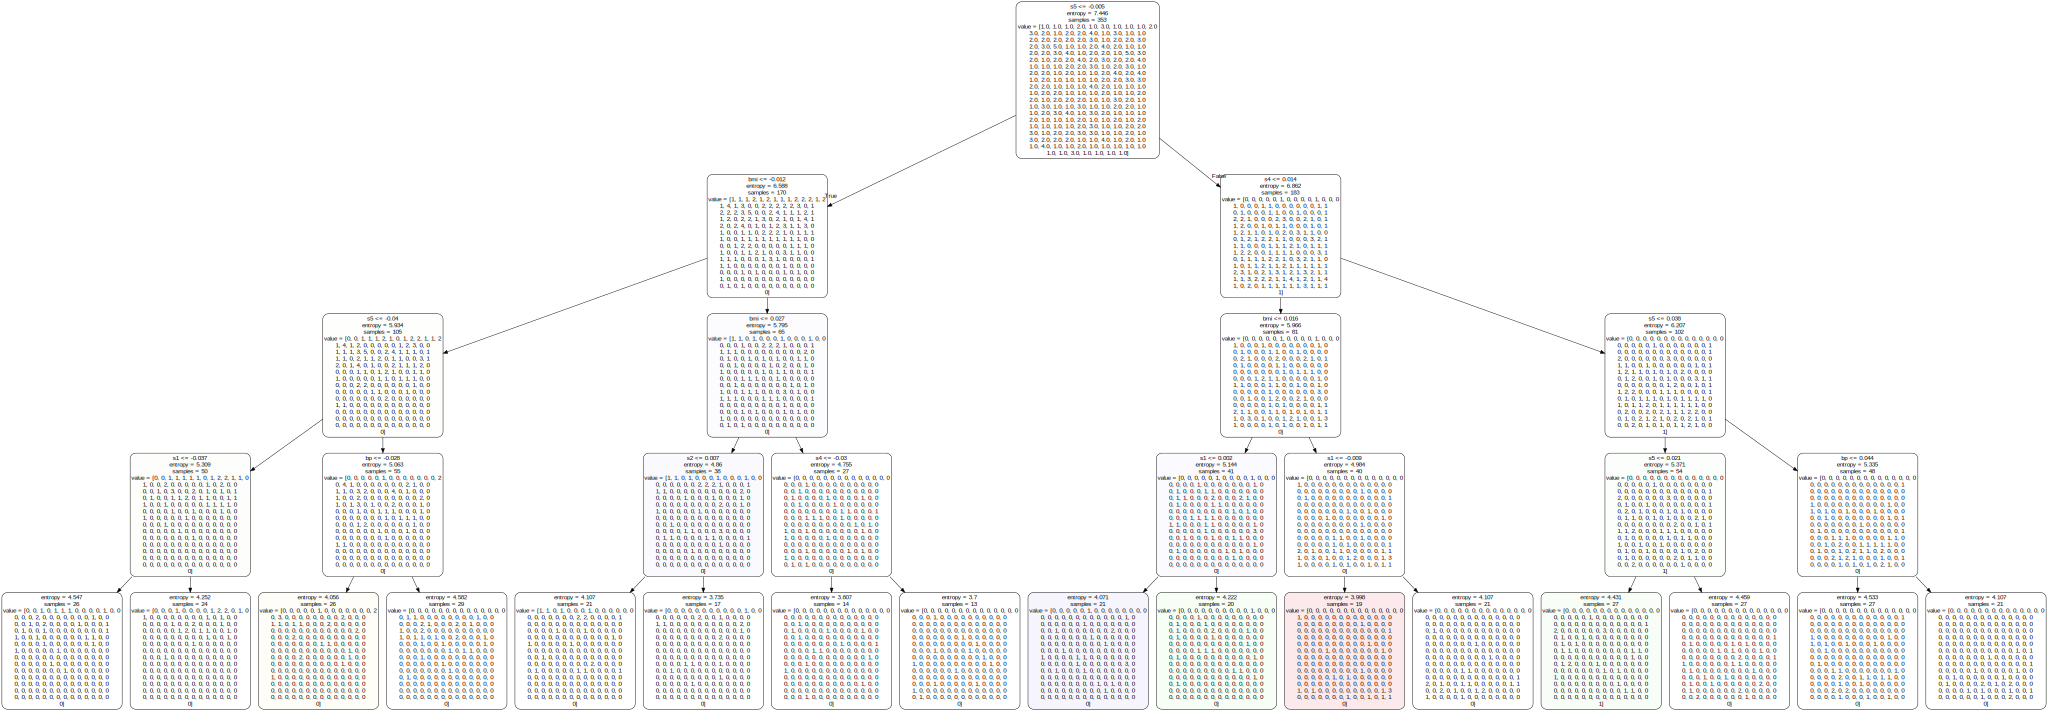

In [ ]:
#Display the Decision Tree
graph=graphviz.Source(dot_data)
graph